## Wine quality Analysis - Corizo Major project

## By - AQUIB KHAN

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as ttt
from sklearn.feature_selection import SelectKBest, f_classif

from statsmodels.formula.api import ols, logit

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import (
    accuracy_score,
    log_loss,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, cross_val_score

import tensorflow as tf

### Data discovery

In [2]:
#READING THE DATA
plt.rcParams['figure.figsize'] = (20,10)

df = pd.read_excel("redwine.xlsx")

df.dropna(axis=0,inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.52       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.52       0.75   
1597                 32.0                  44.0  0.99547  3.52       0.71   
1598                 18.0                  42.0  0.99549  3.52       0.66   

      alcohol  quality  
0         9.4      5.0  
1         9.8      5.0  
2         9.8      5.0  
3         9.8      6.0  
4         9.4      5.0  
...       ...      ...  
1594     10.5      5.0  
1595     11.2      6.0  
1596     11.0      6.0  
1597     10.2      5.0  
1598     11.0      6.0  

[1596 rows x 12 columns]

In [3]:
#DATA DESCRIPTION
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1596.000000       1596.000000  1596.000000     1596.000000   
mean        8.321366          0.527666     0.271128        2.536936   
std         1.742121          0.179154     0.194847        1.408341   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1596.000000          1596.000000           1596.000000  1596.000000   
mean      0.087487            15.882206             46.431078     0.996745   
std       0.047107            10.467380             32.893072     0.001889   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996745   
75%       0.090000            21.000000             62.000000     0.997842   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1596.000000  1596.000000  1596.000000  1596.000000  
mean      3.498716     0.658189    10.424217     5.636591  
std       0.080297     0.169587     1.066046     0.807963  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.520000     0.550000     9.500000     5.000000  
50%       3.520000     0.620000    10.200000     6.000000  
75%       3.520000     0.730000    11.100000     6.000000  
max       3.900000     2.000000    14.900000     8.000000

In this analysis we will be focusing on some of the following questions:

1. What chemical characteristics are most important in predicting the quality of wine?
2. Do wines with higher alcohol content receive better ratings?
3. Do sweeter wines (more residual sugar) receive better ratings?
4. What level of acidity is associated with the highest quality?
5. What are the top deciding features to dictate the quality of wine?
6. How does the quality of wine vary with its chemical characteristics?
7. How do the features correlate with each other?
8. Does the classification provide a clean distinction with respect to any of the features?

*These questions are not an exhaustive list and more will be added adhoc.*


We will first find out if the dataset is balanced (all classes have equal samples) or imbalanced. Reasons for imbalanced classes maybe; 
1. Biased Sampling.
2. Errors in Measurement.

<Axes: >

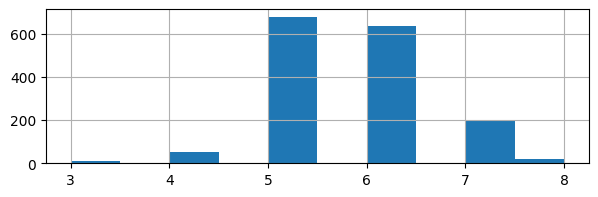

In [4]:
#DATA RESPONSE HISTOGRAM
df['quality'].hist(figsize=(7,2))

<Axes: >

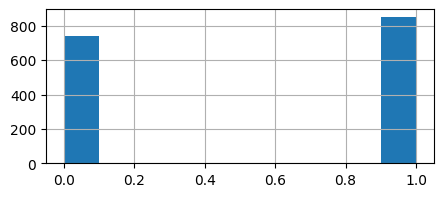

In [5]:
#BINARY RESPONSE HISTOGRAM
df['target'] = df.quality.apply(lambda x: 1 if x>5 else 0)
df.target.hist(figsize=(5,2))

We can see from the above histogram that the classes imbalanced. Taking quality > 5 as 1 will attempt to somewhat balance the classes a little bit by converting the multi-class problem into a binary classification. 

We have the target variable ready for analysis. Let us now make the predictors ready.

### Preprocessing Data

To make the data ready for analysis, some preprossing has been done to the extend of the following:
1. Renaming columns for ease of access
2. Normalization of data to prevent gradient explosion
3. Saving the modified dataset 
4. train-test split for machine learning 

In [6]:
#PREPROCESSING
#Renaming columns

def rename(df):
    cols = df.columns.to_list()
    for i,j in enumerate(cols):
        cols[i] = j.strip(" ")[:4]
    #df.rename(columns=cols)
    return {v:k for k,v in zip(cols,df.columns.to_list())}
cols = rename(df)
dfr = df.rename(mapper=cols,axis=1)

#Normalization
for i in dfr.columns.drop(['qual','targ']).to_list():
    dfr[f'{i}'] = (dfr[f'{i}'] - dfr[f'{i}'].mean())/dfr[f'{i}'].std()

#Saving
dfr.drop('qual',axis=1).to_csv('wine.csv')

#train test split
dfr = dfr.dropna()
X = dfr.drop(['qual','targ'],axis=1)
Yr = dfr['qual']
Yc = dfr['targ']

(xtr,xte,ytr,yte) = ttt(X,Yr,train_size=0.8)#mulit-class
(xtr,xte,ytrr,ytee) = ttt(X,Yc,train_size=0.8)#binary-class



### Exploratory Data Analysis

##### Pairplot analysis:
Attempt to understand the relationship between predictors by plotting them against each other.

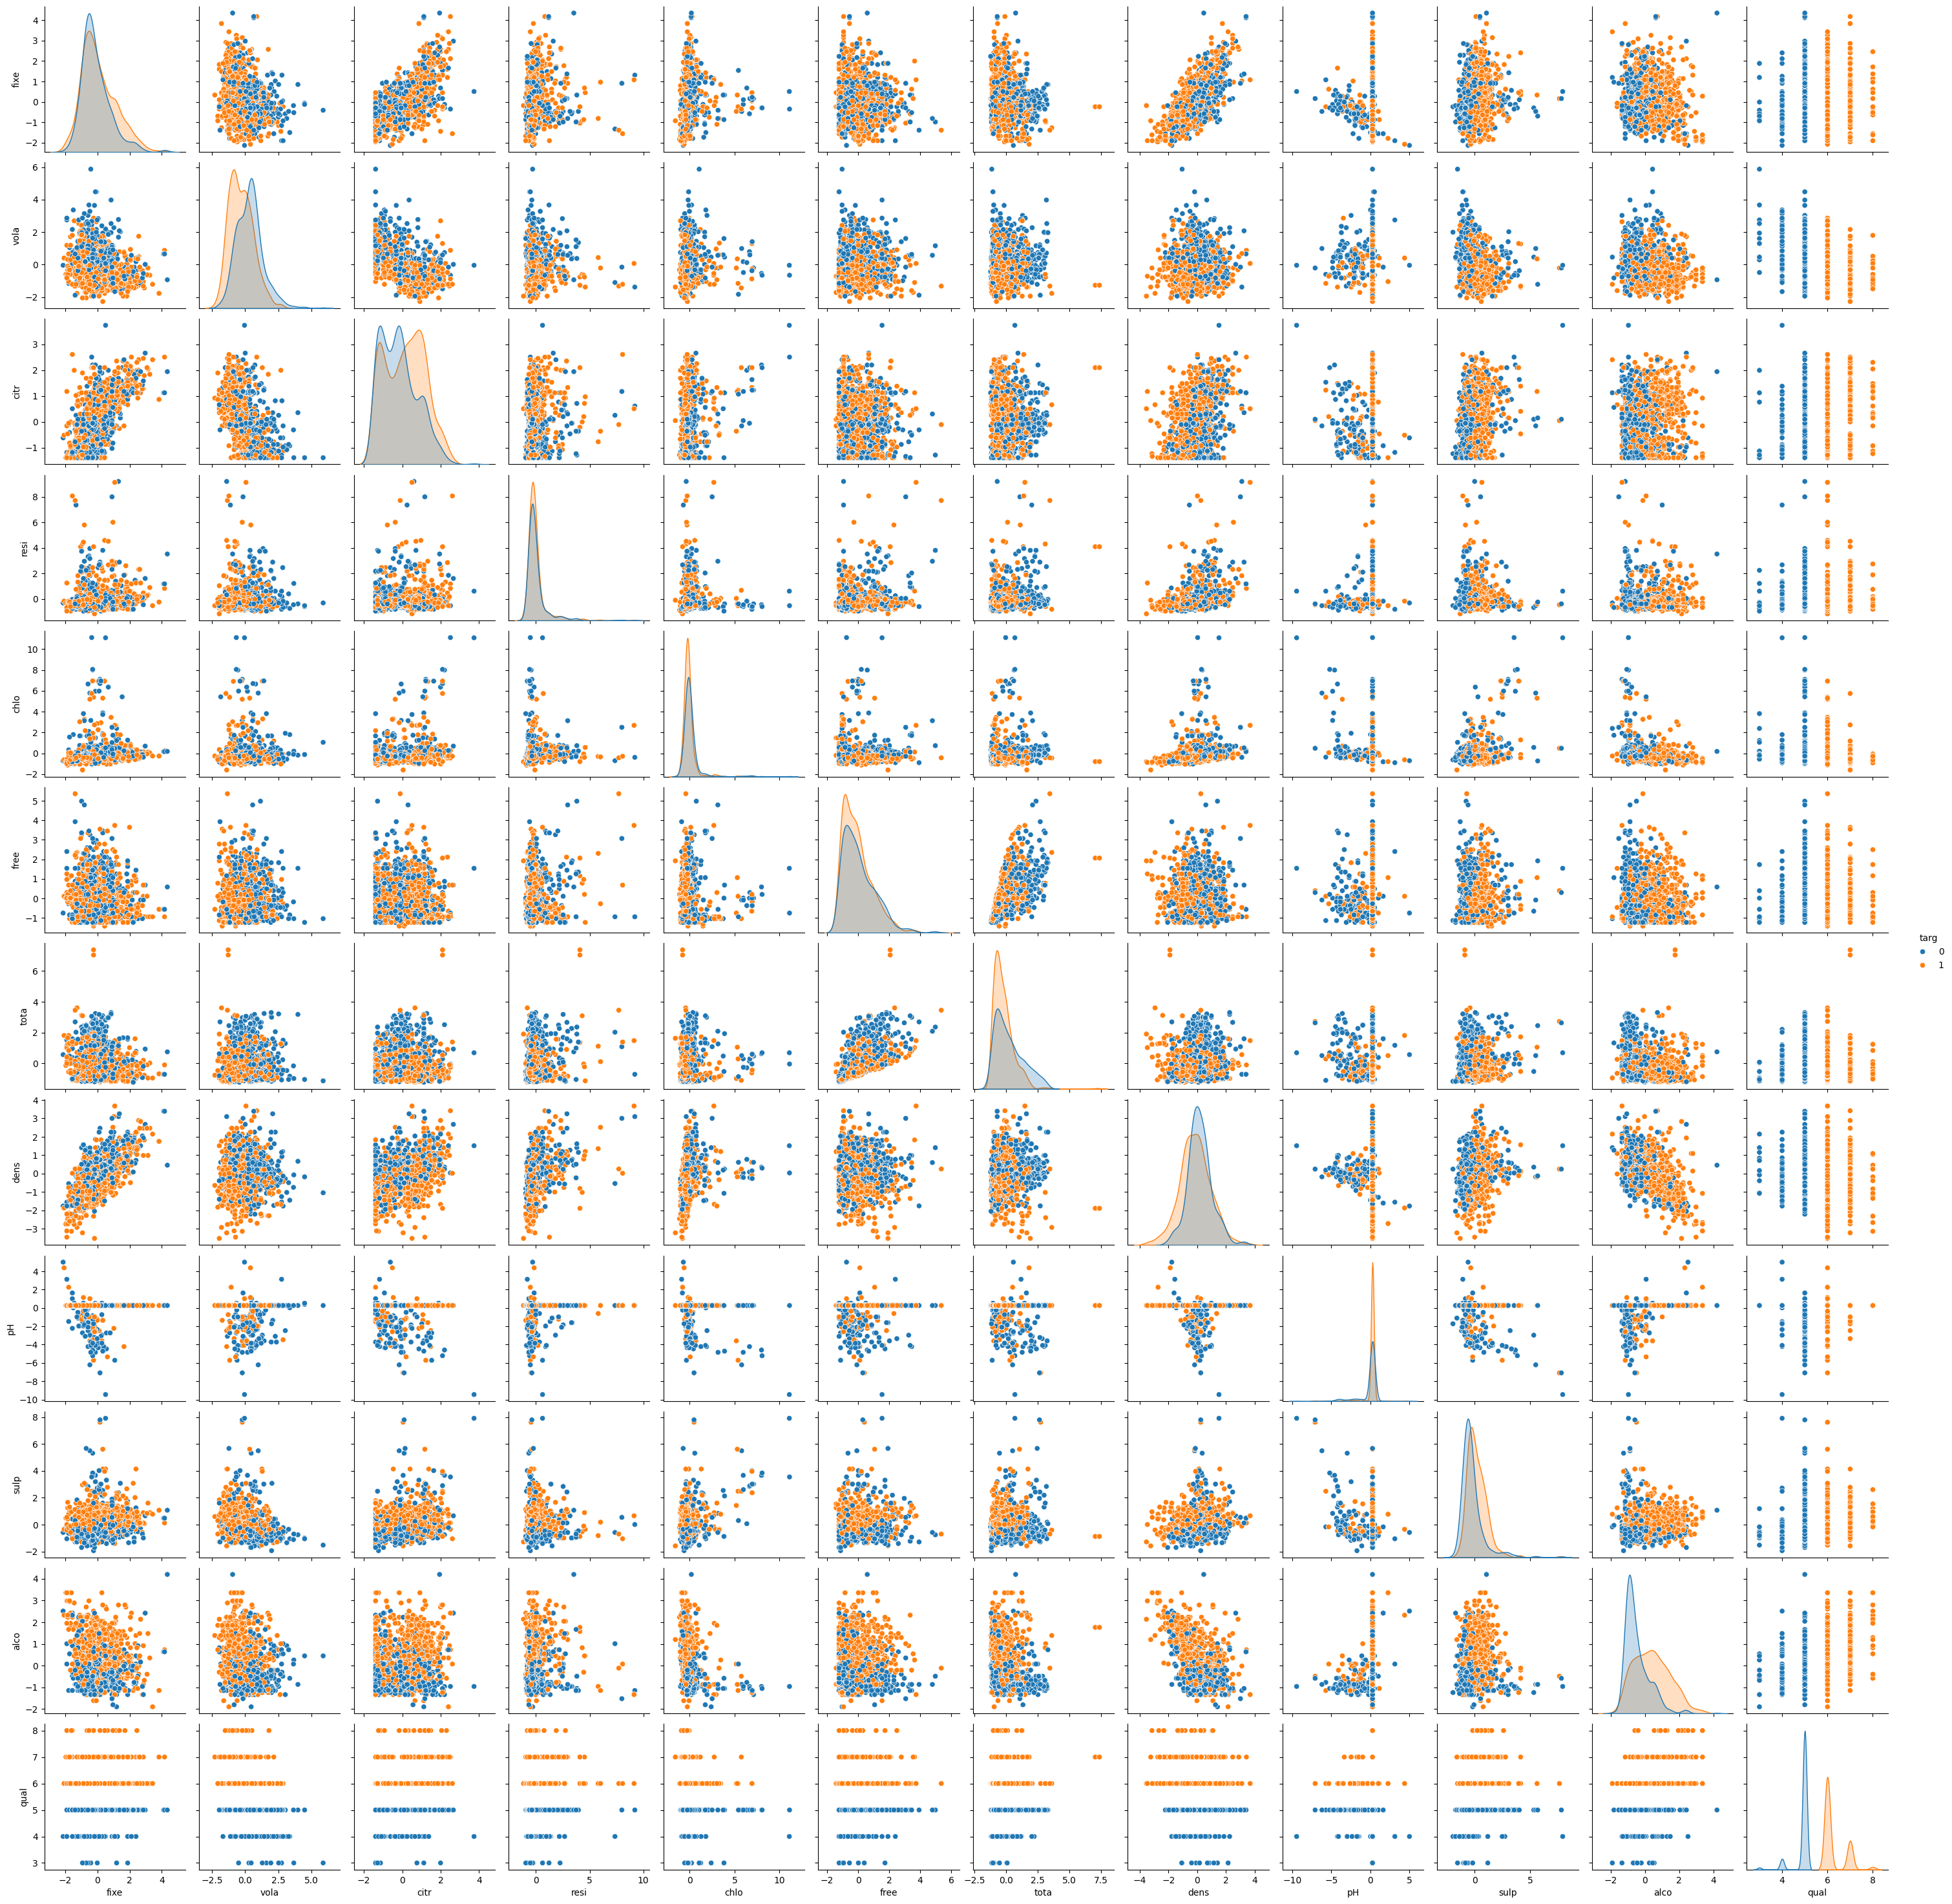

In [7]:
#PAIR-PLOTTING
sns.pairplot(data=dfr,hue='targ',kind='scatter',)

We can understand, from the above scatter plotting, that the predictors do not clearly delineate between the target variable (quality > 5). We can also find that some of the predictors are collinear, or appear to be so.
We proceed to do a multi-collinearity test among the predictors.


##### Correlation Analysis:
Attempt to understand the correlation among the predictors.

Text(0.5, 1.0, "Spearman's correlation")

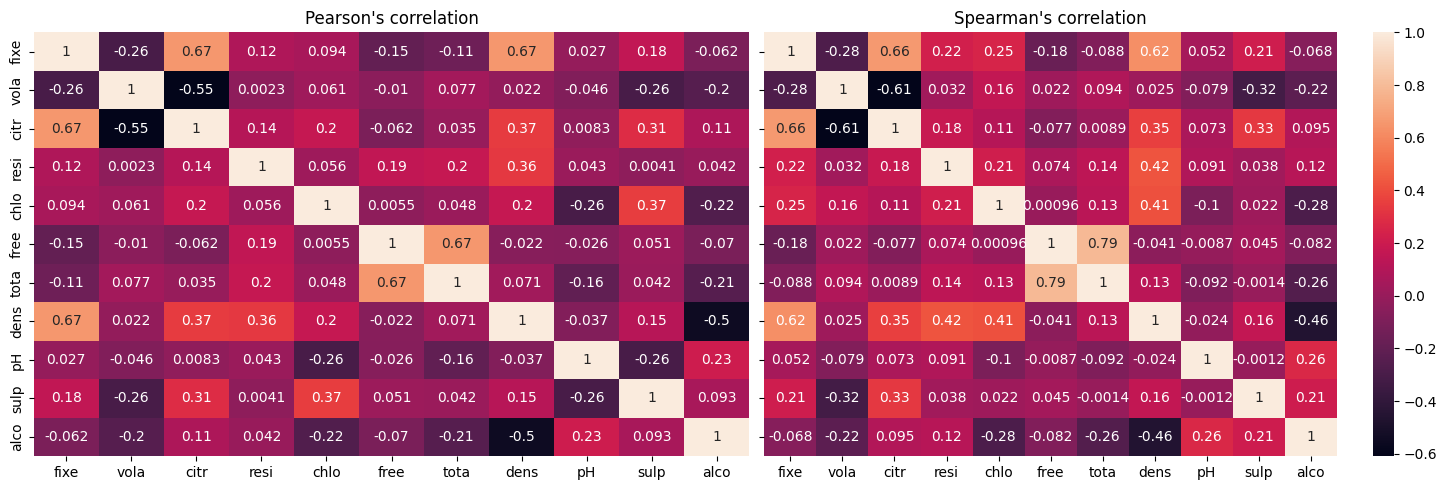

In [8]:
#CORRELATION PLOTTING
corr1 = X.corr(method='pearson')
corr2 = X.corr(method='spearman')

f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),squeeze=True,sharey=True)

sns.heatmap(corr1, annot=True,ax=ax1,cbar=False);sns.heatmap(corr2, annot=True,ax=ax2)
f.set_tight_layout(True)
ax1.set_title("Pearson's correlation");ax2.set_title("Spearman's correlation")


##### Correlation Distribution w.r.t. Quality:
Attempt to find which predictor is correlated with the target and with what magnitude.


<Axes: title={'center': 'Correlation with dependent variable'}>

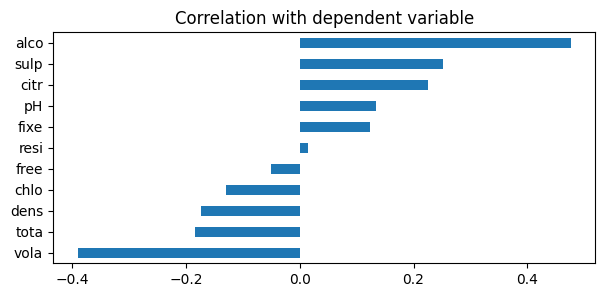

In [9]:
# CORRELATION DISTRIBUTION
corr3 = dfr.drop('targ',axis=1).corr()['qual'].sort_values().drop('qual')
corr3.plot(kind='barh',style='-',figsize=(7,3),title="Correlation with dependent variable")

The bar plot above shows that the features in the middle, such as **residual sugar, chlorides, fixed acidity and free sulfer dioxide** do not seem to impact the quality a lot, and can be ignored for the model building.

##### Feature importance with F-test:
We will use the ANNOVA framework to find out wich predictors are jointly significant in predicting quality.

Index(['vola', 'citr', 'tota', 'dens', 'sulp', 'alco'], dtype='object')

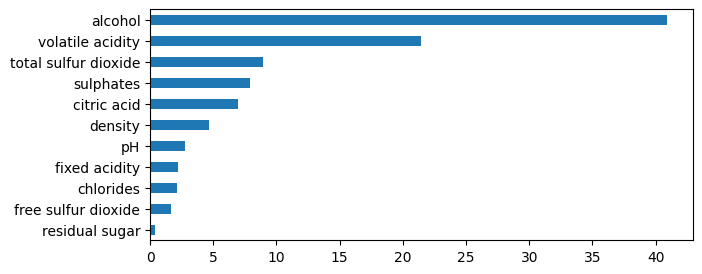

In [10]:
#ANNOVA FEATURE SELECTION
fs = SelectKBest(score_func=f_classif, k="all")
fs.fit(X, Yr)

fcontr = (fs.scores_ / sum(fs.scores_)) * 100

feat_imp = {}

for i, j in zip(df.drop(['target','quality'],axis=1).columns,fcontr):
    feat_imp[i] = j

pd.Series(feat_imp).sort_values().plot(kind='barh',figsize=(7,3))

drop = [
    'resi',
    'free',
    'chlo',
    'fixe',
    'pH'
]

X.columns.drop(drop)

We confirm the predictors with low correlation with the response, are the ones which have the lowest F-scores and hence lowest contribution to predicting the response.

In [11]:
#P-VALUES OF F-TEST
pd.Series(fs.pvalues_,index=df.drop(['target','quality'],axis=1).columns,name="P-values of F-test")

fixed acidity            9.232552e-06
volatile acidity         4.083902e-58
citric acid              5.033010e-19
residual sugar           3.825579e-01
chlorides                1.477510e-05
free sulfur dioxide      2.521301e-04
total sulfur dioxide     1.053065e-24
density                  9.831892e-13
pH                       2.117643e-07
sulphates                1.138147e-21
alcohol                 1.240564e-104
Name: P-values of F-test, dtype: float64

The P-values of the F-test confirm that the predicotrs - **residual sugar, free sulfur dioxide, chlorides and fixed acidity** can be safely removed from the analysis without much difference to prediction results. 

### Machine Learning 

##### Breif

In this section we will train, test and compare various machine learning models to find out which is the best model design for this classification task. 

Models used:
1. Standard OLS
2. Linear Discriminant Ananlysis
3. Quadratic Discriminant Analysis
4. Decision Tree Cl
5. Random Forest Cl
6. AdaBoost Cl
7. GradientBoost Cl
8. XGBoost Cl
9. XGRFBoost Cl
10. ExtraTree Cl

Metrics used:
1. Accuracy
2. Precision
3. Recall
4. F1 score
5. log loss

##### Standard OLS and Logistic regression

In [12]:
#STANDARD OLS REGRESSION AGAINST DISCRETE REGRESSORS WILL PRODUCE OMNIOUS RESULTS. PREDICTION FROM THIS MODEL WILL NOT BE MADE.
k="+".join(dfr.columns.drop(['qual','targ']).drop(drop))
model1 = ols(formula=f"qual ~{k}" ,data=dfr)
res1 = model1.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qual   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          5.05e-142
Time:                        01:01:49   Log-Likelihood:                -1586.4
No. Observations:                1596   AIC:                             3187.
Df Residuals:                    1589   BIC:                             3224.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6366      0.016    343.658      0.000       5.604       5.669
vola          -0.2236      0.021    -10.726      0.000      -0.265      -0.183
citr          -0.0185      0.023     -0.788      0.431      -0.064       0.027
tota          -0.0709      0.017     -4.177      0.000      -0.104      -0.038
dens           0.0193      0.023      0.855      0.392      -0.025       0.063
sulp           0.1208      0.018      6.877      0.000       0.086       0.155
alco           0.3257      0.021     15.597      0.000       0.285       0.367
==============================================================================
Omnibus:                       28.870   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.655
Skew:                          -0.158   Prob(JB):                     1.22e-10
Kurtosis:                       3.766   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#STANDARD LOGISTIC REGRESSION
import statsmodels.api as sm

xtrd = xtr.drop(drop,axis=1)
xted = xte.drop(drop,axis=1)

log_reg = sm.Logit(ytrr, xtr.drop(drop,axis=1))
log_pred = log_reg.fit()
y_pred = log_pred.predict(xted)
y_pred = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
log_pred.summary()

Optimization terminated successfully.
         Current function value: 0.537900
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   targ   No. Observations:                 1276
Model:                          Logit   Df Residuals:                     1270
Method:                           MLE   Df Model:                            5
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.2215
Time:                        01:01:50   Log-Likelihood:                -686.36
converged:                       True   LL-Null:                       -881.69
Covariance Type:            nonrobust   LLR p-value:                 3.058e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vola          -0.6667      0.094     -7.057      0.000      -0.852      -0.481
citr          -0.2458      0.098     -2.521      0.012      -0.437      -0.055
tota          -0.4093      0.073     -5.581      0.000      -0.553      -0.266
dens           0.1510      0.093      1.621      0.105      -0.032       0.334
sulp           0.3537      0.070      5.081      0.000       0.217       0.490
alco           0.9680      0.091     10.580      0.000       0.789       1.147
==============================================================================
"""

In [14]:
#accuracies = cross_val_score(estimator=log_pred, X=xtrd, y=ytrr, cv=5)
print("Logistic Regression:")
print("Accuracy: ",accuracy_score(y_pred, ytee))
print("F1: ",f1_score(y_pred, ytee, average="macro"))
print("Precision: ",precision_score(y_pred, ytee, average="macro"))
print("Accuracy: ",recall_score(y_pred, ytee, average="macro"))

Logistic Regression:
Accuracy:  0.753125
F1:  0.7531225890877841
Precision:  0.7586600535348764
Accuracy:  0.758385435098895


##### Trees and Ensemble

In [15]:
#ENSEMBLE AND TREES - 
models = [
    DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best',),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreeClassifier(criterion='entropy',splitter='best'),
    lda(solver='svd',store_covariance=True),
    qda(store_covariance=True),
    XGBClassifier(),
    XGBRFClassifier()
    ]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(xtrd, ytrr)
    y_pred = model.predict(xted)
    accuracies = cross_val_score(estimator=model, X=xtrd, y=ytrr, cv=5)
    print(classification_report(ytee, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)[:20]}"] = [
        accuracy_score(y_pred, ytee),
        f1_score(y_pred, ytee, average="macro"),
        precision_score(y_pred, ytee, average="macro"),
        recall_score(y_pred, ytee, average="macro"),
        (accuracies.mean()),
        log_loss(y_pred, ytee)
    ]

Model: DecisionTreeClassifier(criterion='entropy', random_state=0)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       146
           1       0.79      0.81      0.80       174

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.88      0.84      0.86       174

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320

------------------------------ 

Model: KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       146
           1       0.77  

In [16]:
models_comparison

{'DecisionTreeClassifi': [0.78125,
  0.779040404040404,
  0.7784600850259802,
  0.7798702326317455,
  0.7444944852941177,
  7.884549178869378],
 'RandomForestClassifi': [0.853125,
  0.8524897262625173,
  0.8539206424185168,
  0.8518844663613949,
  0.7829166666666666,
  5.293911591526582],
 'KNeighborsClassifier': [0.7625,
  0.7594556100648837,
  0.7584632341363564,
  0.7614269788182833,
  0.7123805147058825,
  8.560367679915325],
 'AdaBoostClassifier()': [0.753125,
  0.7510806526255674,
  0.7509447331128956,
  0.7512315270935961,
  0.7241390931372549,
  8.898276930438296],
 'GradientBoostingClas': [0.771875,
  0.7704740849914027,
  0.7709415840025193,
  0.7701440401899604,
  0.7562714460784313,
  8.22245842939235],
 'ExtraTreeClassifier(': [0.75625,
  0.752763580173541,
  0.7516139190678633,
  0.7554347826086957,
  0.7194087009803922,
  8.785640513597306],
 'LinearDiscriminantAn': [0.775,
  0.774568510038746,
  0.7771217131160447,
  0.7749999999999999,
  0.735125612745098,
  8.10982201

In [17]:
#MODEL COMPARISION
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy",
    "Log-Loss"
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df

Model Accuracy  Model F1-Score  Precision    Recall  \
RandomForestClassifi        0.853125        0.852490   0.853921  0.851884   
XGBClassifier(base_s        0.831250        0.830588   0.832152  0.830074   
DecisionTreeClassifi        0.781250        0.779040   0.778460  0.779870   
LinearDiscriminantAn        0.775000        0.774569   0.777122  0.775000   
QuadraticDiscriminan        0.775000        0.773264   0.773264  0.773264   
GradientBoostingClas        0.771875        0.770474   0.770942  0.770144   
XGBRFClassifier(base        0.768750        0.766700   0.766415  0.767045   
KNeighborsClassifier        0.762500        0.759456   0.758463  0.761427   
ExtraTreeClassifier(        0.756250        0.752764   0.751614  0.755435   
AdaBoostClassifier()        0.753125        0.751081   0.750945  0.751232   

                      CV Accuracy  Log-Loss  
RandomForestClassifi     0.782917  5.293912  
XGBClassifier(base_s     0.768778  6.082367  
DecisionTreeClassifi     0.744494  7.884549  
LinearDiscriminantAn     0.735126  8.109822  
QuadraticDiscriminan     0.740600  8.109822  
GradientBoostingClas     0.756271  8.222458  
XGBRFClassifier(base     0.747638  8.335095  
KNeighborsClassifier     0.712381  8.560368  
ExtraTreeClassifier(     0.719409  8.785641  
AdaBoostClassifier()     0.724139  8.898277

### Deep Learning

Here I will build a simple Neural network for a mulit-label classification. I do not expect the results to be drastically different from the machine learning ones.

In [18]:
#BASIC PRE-PROCESSING FOR TENSORFLOW IMPLEMENTATION
xtr = xtr.to_numpy().reshape(xtr.shape[0],xtr.shape[1])
xte = xte.to_numpy().reshape(xte.shape[0],xte.shape[1])

ytr = ytr - 3
yte = yte - 3

yt = ytr.to_list()
ytr = tf.keras.utils.to_categorical(y=yt,num_classes=6,dtype='uint8')

xtr.shape,ytr,yt[:7]

((1276, 11),
 array([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        ...,
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0]], dtype=uint8),
 [2.0, 3.0, 3.0, 2.0, 4.0, 5.0, 2.0])

In [19]:
#BUILDING THE MODEL
import tensorflow as tf

model = tf.keras.Sequential(name="Wine_classifier")
model.add(tf.keras.layers.Dense(units=1000,activation='relu',input_dim=xtr.shape[1]))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "Wine_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              12000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
Total params: 563206 (2.15 MB)
Trainable params: 563206 (2.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#FITTING THE MODEL
history = model.fit(
    x = xtr,
    y = ytr,
    batch_size=32,
    epochs=1000
)

Epoch 1/1000
40/40 [==============================] - 2s 13ms/step - loss: 1.3229 - accuracy: 0.4350
Epoch 2/1000
40/40 [==============================] - 1s 18ms/step - loss: 1.2115 - accuracy: 0.4483
Epoch 3/1000
40/40 [==============================] - 1s 18ms/step - loss: 1.1891 - accuracy: 0.4467
Epoch 4/1000
40/40 [==============================] - 1s 19ms/step - loss: 1.1851 - accuracy: 0.4389
Epoch 5/1000
40/40 [==============================] - 1s 17ms/step - loss: 1.1633 - accuracy: 0.4694
Epoch 6/1000
40/40 [==============================] - 1s 15ms/step - loss: 1.1576 - accuracy: 0.4647
Epoch 7/1000
40/40 [==============================] - 1s 12ms/step - loss: 1.1390 - accuracy: 0.4969
Epoch 8/1000
40/40 [==============================] - 1s 13ms/step - loss: 1.1282 - accuracy: 0.5055
Epoch 9/1000
40/40 [==============================] - 1s 13ms/step - loss: 1.1079 - accuracy: 0.5039
Epoch 10/1000
40/40 [==============================] - 1s 14ms/step - loss: 1.0918 - accura

In [ ]:
#LOSS PLOTTING
plt.figure(figsize=(7,3))
x=history.history['loss']
y=[i for i in range(1000)]
print(len(x),len(y))
plt.bar(x=y,height=x);plt.title("loss")

In [ ]:
#MODEL PREDICTION
ytt = model.predict(xte)
ytf = np.array([i.argmax() for i in ytt])
np.sum(yte.to_list()-ytf)

In [ ]:
#PREDICTION PLOTTING (CONFUSION MATRIX)
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(yte,ytf))
plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(confusion_matrix(yte,ytf)).plot()

### Dimension Reduction

For the last section, I will try reducing dimension without dropping columns to see if prediction improves.

In [ ]:
#PCA INITIALIZATION
pca  = PCA(n_components=6, )
new = pca.fit_transform(dfr.drop(['qual','targ'],axis=1))
new = pd.DataFrame(new,columns=[f'PC'+str(i) for i in range(6)])
pcx = pd.concat([new,dfr.targ],axis=1).dropna()
pcx

In [ ]:
import seaborn as sns
sns.pairplot(pcx,hue='targ')

In [ ]:
#MODEL BUILDING
X = pcx.drop(['targ'],axis=1)
Y = pcx['targ']

(xtr,xte,ytr,yte) = ttt(X,Y,train_size=0.8)

models = [
    DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best',),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreeClassifier(criterion='entropy',splitter='best'),
    lda(solver='svd',store_covariance=True),
    qda(store_covariance=True),
    XGBClassifier(),
    XGBRFClassifier()
    ]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(xtr, ytr)
    y_pred = model.predict(xte)
    accuracies = cross_val_score(estimator=model, X=xtr, y=ytr, cv=5)
    print(classification_report(yte, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)[:20]}"] = [
        accuracy_score(y_pred, yte),
        f1_score(y_pred, yte, average="macro"),
        precision_score(y_pred, yte, average="macro"),
        recall_score(y_pred, yte, average="macro"),
        (accuracies.mean()),
        log_loss(y_pred, yte)
    ]
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy",
    "Log-Loss"
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df

### Conclusion

Here we conclude our findings about this project. The aim of this project was to analyse a dataset containing constituents and specifications for different samples of wines. The objective was to present such a model that be able to correctly predict the quality of the wine. The target was converted into binary, with values greater than equal to 6 were good, and the discrete regreesion problem was essentially converted into a classification problem.


First the data was pre-processed, to make it easy to deal with. This included, shortening column names, normalizing the data and train-test splitting. Then we proceeded to plot the inter-feature scatter plot and analysing the same w.r.t. the dependent variable. It was found that a clean distiction was not possible for a lot fo features. A correlation heatmap was also made to see mulit-collinearity amongst the features. Feature importance was decided based on ANNOVA F-test, and found that some of the features, including residual sugar, free sulfur dioxide, chlorides and fixed acidity were not significant in predicting the response variable. Based on this, these features were removed from the analysis.

After the dataset was ready for predictive analysis, a number of classification models, including LDA, QDA, Logistic regression, Decision tree, Random forest, Extra tree, Xgboost and xgrfboost, were used and compare amongst each other. It was found that ensemble techniques performed much better than standard tree based classifiers, with in turn performed better than discriminant analysis and logistic regression. Some of the metrics used to compare the results included accuracy, precision, recall, F1 and CV scores. A table was made to compare the results.


A simple deep learning model was also used on this dataset. The problem was made into a mulit-class classification, with 6 labels (o to 5). Three dense layers with about 550,000 parameters were added and compiled with 'categorical cross-entropy' loss and 'adam' optimizer. The model performed fairly poorly than the standard machine learning model, as the classes were imbalanced, the predictive capability was considered dubious. A confusion matrix display was used to summarize the result, of which the accuracy was a poor 32%, with a lot of mis-labelled classifications. 

Finally, a dimension reduction technique, principal component analysis, was used to reduce the dimentionality of the dataset, without dropping any columns. The number of components were set to 6, to be able to compare with the machince learning models, which had the same number of feature columns.The model performed worse than the standard machine learning models, with dropped columns. This showed us that dimension reduction, even though very usefull for unsupervised clustering, was not the optimal choice for classification problems. 

To conclude, we find that ensemble tree based models, after removing unwanted features, were the best performing models for this task of classification. 

### END